In [38]:
from __future__ import division, print_function

import Newtonian_py
print(Newtonian_py.description())

Newtonian model with no delay.
  The parameters are [t | n,e,w | | ] .


In [4]:
import numpy as np

day = 24*3600
year = 365*day
MSun = 4.92703806e-6
M = 1e9*MSun
n = 2*np.pi/year
e = 0.5
w = np.pi/2
t0 = 0
params = [t0, n,e,w]

In [5]:
help(Newtonian_py.outburst_times)

Help on built-in function outburst_times in module Newtonian_py:

outburst_times(...)
    outburst_times( (object)arg1, (object)arg2, (object)arg3, (object)arg4, (object)arg5) -> numpy.ndarray :
    
        C++ signature :
            boost::python::numpy::ndarray outburst_times(boost::python::api::object,boost::python::api::object,double,double,double)



In [6]:
phis = np.pi * np.array([1,3,4])
epsabs = epsrel = 1e-14
init_step = 0.1
ts_outburst = Newtonian_py.outburst_times(params,phis,epsabs,epsrel,init_step)

In [8]:
print(ts_outburst/year)

[0.19550123 1.19565532 2.00015009]


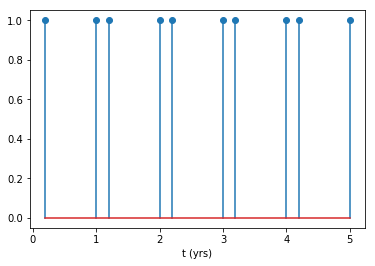

In [14]:
import matplotlib.pyplot as plt

phis = np.pi*np.arange(1,11)
ts_outburst = Newtonian_py.outburst_times(params,phis,epsabs,epsrel,init_step)

plt.stem(ts_outburst/year, np.ones_like(ts_outburst))
plt.xlabel("t (yrs)")
plt.show()

In [27]:
sigma_t = 1*day
ts_outburst_sim = ts_outburst + sigma_t*np.random.randn(len(ts_outburst))

sim_data = np.transpose([phis/np.pi, ts_outburst_sim/year, sigma_t*np.ones_like(phis)/day])
np.savetxt("Newtonian_sim.txt", sim_data)
print(sim_data)

[[ 1.          0.19388818  1.        ]
 [ 2.          1.00036207  1.        ]
 [ 3.          1.19927209  1.        ]
 [ 4.          1.99915664  1.        ]
 [ 5.          2.19586561  1.        ]
 [ 6.          3.00361446  1.        ]
 [ 7.          3.19726045  1.        ]
 [ 8.          3.99876881  1.        ]
 [ 9.          4.19306883  1.        ]
 [10.          5.00044697  1.        ]]


In [28]:
ls

BinX_PN_nestle.py       Fake_PN.py           Newtonian_py.so*   OJ287_sim.txt
BinX_PN_py.so*          Fake.py              Newtonian_sim.txt  Untitled.ipynb
fake_data_PN_oj287.txt  Newtonian_anl.py     OJ287.py
fake_data_PN.txt        Newtonian_nestle.py  OJ287_real.py
fake_data.txt           Newtonian.py         OJ287_real.txt


In [29]:
import nestle

In [30]:
data = np.genfromtxt("Newtonian_sim.txt")
data_phis = np.pi*data[:,0]
data_ts_outburst = data[:,1]*year
data_terrs_outburst = data[:,2]*day

In [32]:
z = 0
lnlike = Newtonian_py.Likelihood(data_phis, data_ts_outburst, data_terrs_outburst, z)

print(lnlike(params))

-129.026715967


In [51]:
t0min,t0max = t0-4*day, t0+4*day
nmin,nmax = 0.99*n, 1.01*n
emin,emax = 0.4,0.8
wmin,wmax = 0, np.pi
mins = np.array((t0min,nmin,emin,wmin))
maxs = np.array((t0max,nmax,emax,wmax))
spans = maxs-mins
def prior_transform(x):
    return spans*x + mins

In [52]:
ndim = Newtonian_py.N_PARAMS
result = nestle.sample(lnlike, prior_transform, ndim, npoints=500)

In [53]:
print("log evidence = ", result.logz)
print("log evidence uncertainty = ", result.logzerr)

log evidence =  -134.4364639685629
log evidence uncertainty =  0.122365255864


In [45]:
import corner

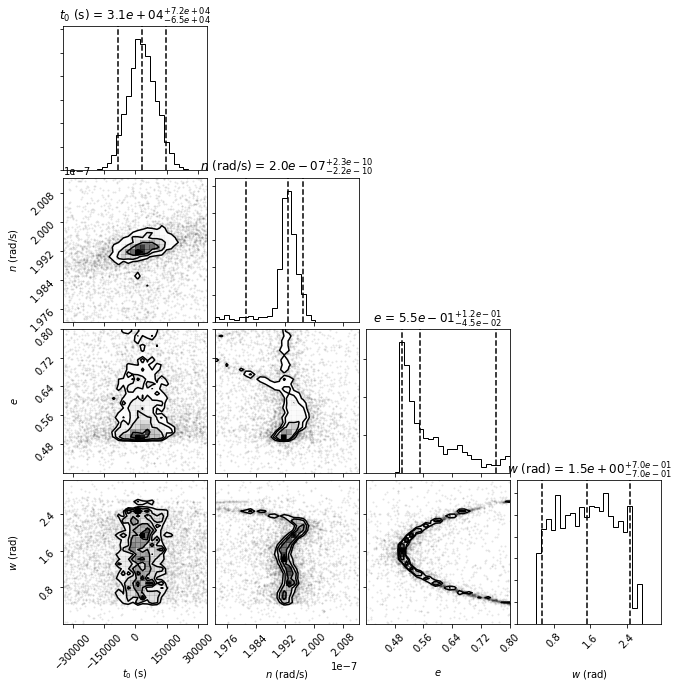

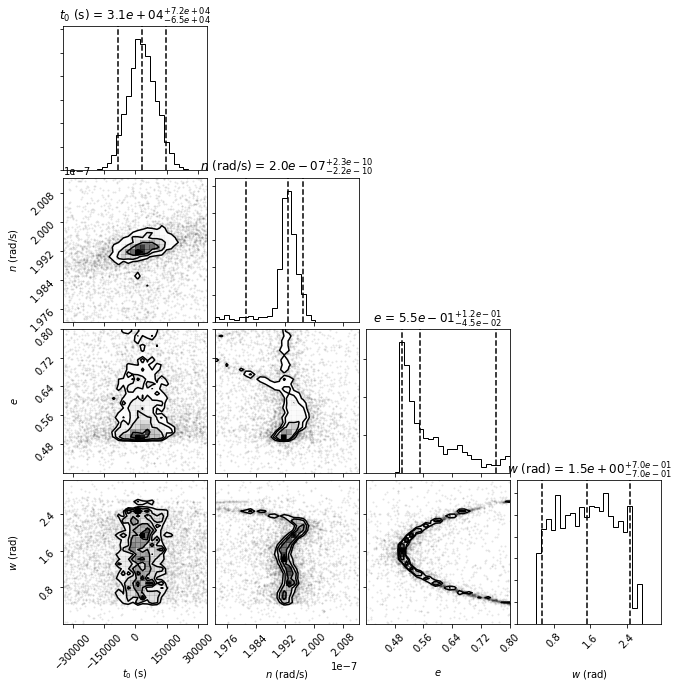

In [58]:
corner.corner(result.samples, weights=result.weights, 
              quantiles=[0.0455, 0.5, 0.9545], bins=30, 
              labels=['$t_0$ (s)','$n$ (rad/s)','$e$','$w$ (rad)'], 
              show_titles=True, title_fmt=".1e")